### Taller Modelos de Aprendizaje Automático para predicción de tarifas de Uber

**Diego Alejandro Alzate Rodríguez**

- Realice un análisis exploratorio de las variables, concentrándose en la distribución de la variable respuesta. ¿Qué patrones observa y cómo cree que podrían influir en el modelo de regresión?

- Evalúe la relación entre la distancia del viaje (calculada a partir de las coordenadas de origen y destino) y el costo del viaje. ¿Es esta relación lineal? ¿Existen otras variables que podrían estar asociadas con el costo del viaje?

- Item Ajuste un modelo de regresión para predecir \texttt{fare\_amount}. (Modelo Lineal, Ridge, Lasso, Árbol de Regresión, Bosque Aleatorio) Haga la respectiva selección de hiperparámetros en cada modelo y elija el mejor (Si puede, implemente este ejercicio en clases)
 
- Uber ha publicado información sobre sus viajes, lo que permite tener acceso a datos como la fecha, hora, origen, destino, kilómetros recorridos, número de pasajeros y tarifa. El objetivo de este análisis es desarrollar un modelo de regresión lineal que permita predecir el costo de un viaje (\texttt{fare\_amount}) en función de las variables disponibles.
 
Las variables clave del conjunto de datos incluyen:
 - key: Un identificador único para cada viaje.

 - fare\_amount: El costo de cada viaje en USD.

 - pickup\_datetime: Fecha y hora en que se activó el taxímetro.

 - passenger\_count: La cantidad de pasajeros en el vehículo.

 - pickup\_longitude: La longitud en la que se activó el taxímetro.

 - pickup\_latitude: La latitud en la que se activó el taxímetro.

 - dropoff\_longitude: La longitud en la que se desactivó el taxímetro.

 - dropoff\_latitude: La latitud en la que se desactivó el taxímetro.

 
Es importante notar que los datos contienen inconsistencias, como trayectos con longitudes extremadamente largas o un número de pasajeros igual a 0. Por lo tanto, será necesario realizar una limpieza de los datos antes de ajustar el modelo de regresión


In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [675]:
# Leer base de datos
datos = pd.read_csv('uber.csv')
datos.rename(columns = {'Unnamed: 0':'ID'}, inplace=True)
datos.head(10)

,ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [676]:
datos.shape

(200000, 9)

- Tenemos un regsitro de 200.000 observaciones y 9 columnas.

In [677]:
# Verificar datos faltantes
datos.isnull().sum()

ID                   0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [678]:
# Porcentaje de valores faltantes
datos.isnull().mean()*100

ID                   0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

- El porcentaje de valores faltantes es muy pequeño menos del 1%

In [679]:
# Eliminamos valores faltantes
datos.dropna(inplace=True)
datos.describe()

,ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


- Inicialmente tenemos que para la variable *fare_amount* que representa la tarifa del viaje en uber para el usuario, en promedio se paga 11.35 dólares por viaje en Nueva York, donde el 50% de los usuarios pagaron 8.50 dólares o menos y el 25% de los usuarios que más pagaron fue 12.50 dólares o más con la presencia de un viaje que costo aproximadamente 500 dólares.

- Para la cantidad de pasajeros por viaje *passenger_count* en promedio cada viaje aproximadamente es de 2 pasajeros, ahora el 50% de los viajes fue de un pasajero y el 25% de los viajes con mayor cantidad de pasajeros tuvieron 2 o más, con un valor máximo de 208 pasajeros, quizás asociado una renta de autobús.

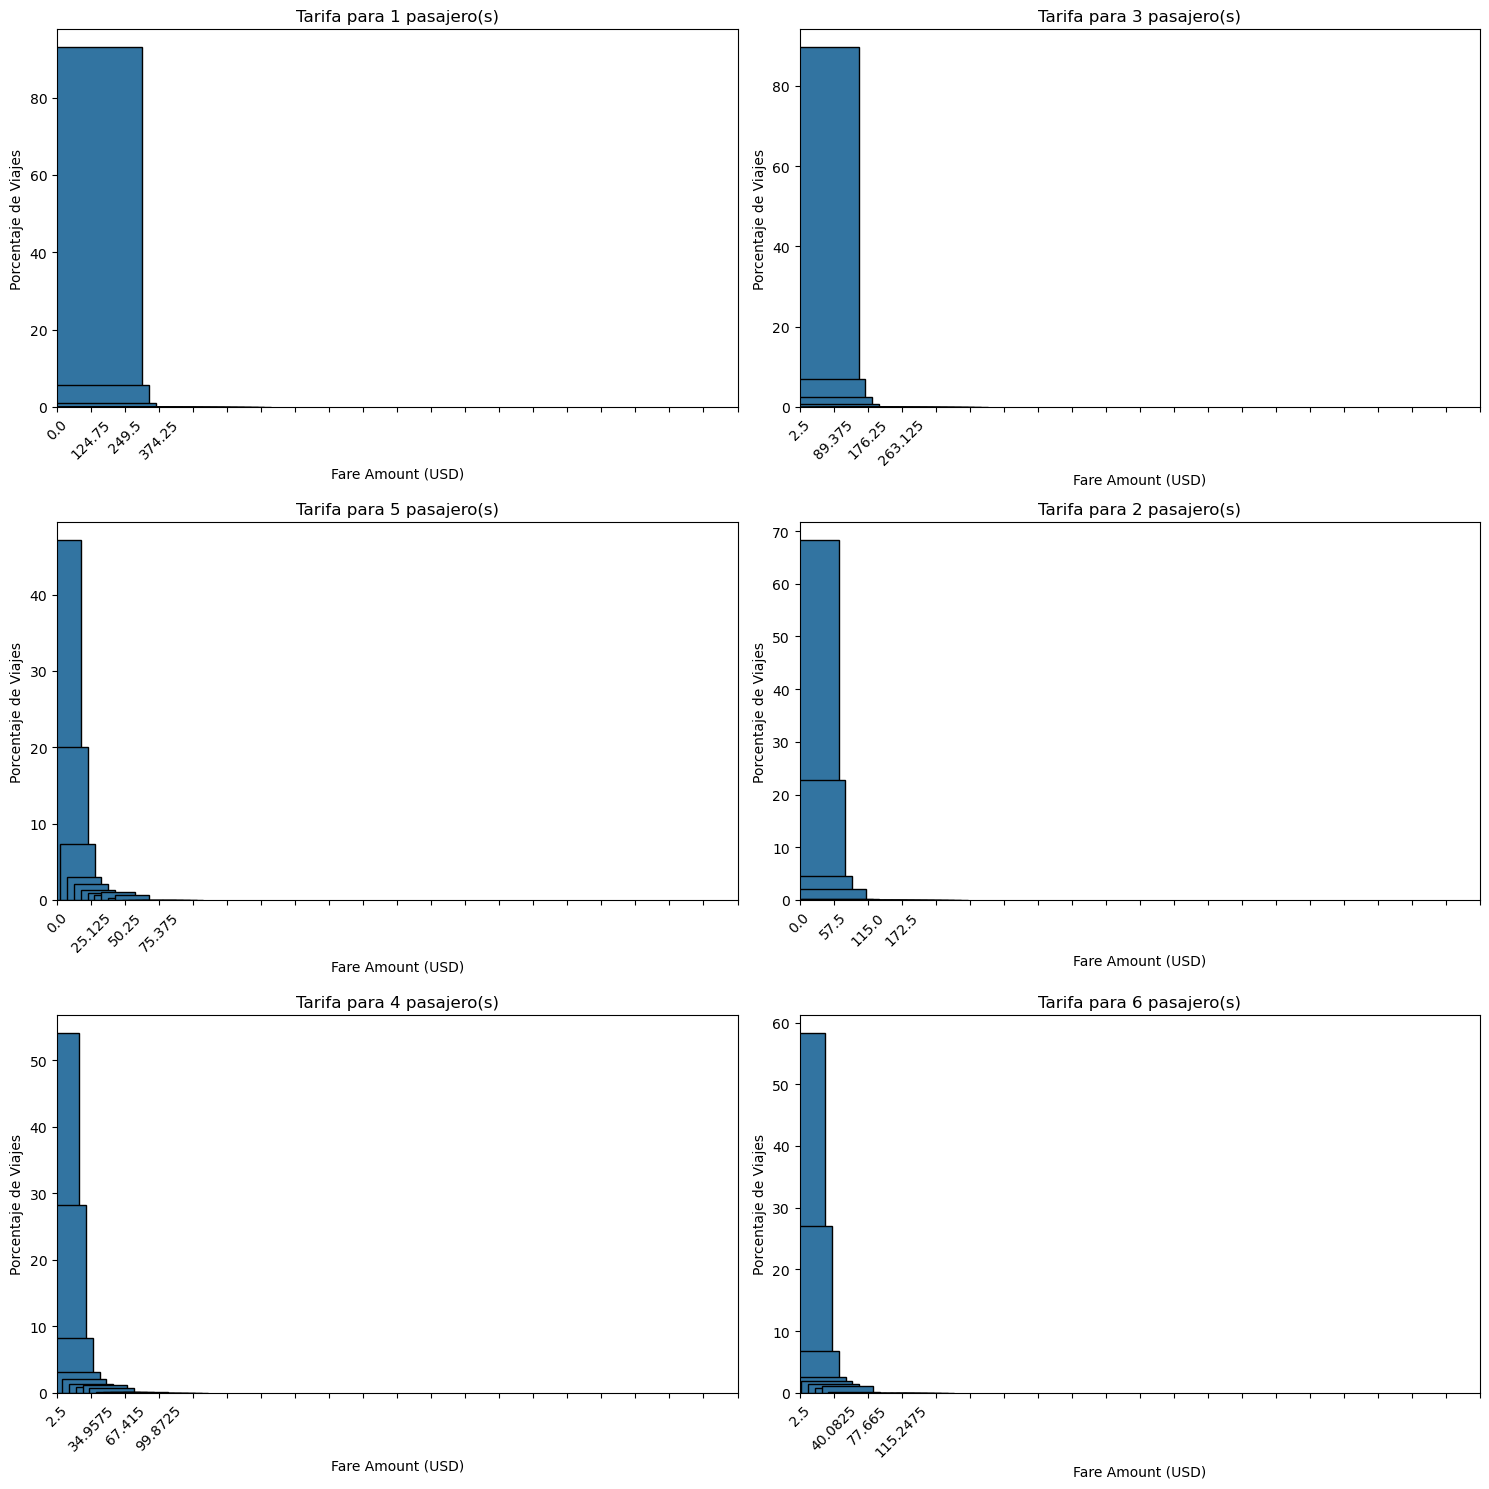

In [680]:
#Limpiamos algunos valores atípicos
datos = datos[(datos['passenger_count']>0) & (datos['passenger_count']<= 10)]
datos = datos[(datos['fare_amount']>=0)]
datos['fare_amount'] = datos['fare_amount'].round(2)
datos['fare_amount'].describe()

# Crear Histograma
counts_pasajeros = datos['passenger_count'].unique()
num_subplots = len(counts_pasajeros)

# Calcular el número de filas y columnas para los subplots
filas = int(np.ceil(np.sqrt(num_subplots)))  # Aproximación a una cuadrícula cuadrada
columnas = int(np.ceil(num_subplots / filas))

fig, axes = plt.subplots(filas, columnas, figsize=(15, 5*filas)) # Ajusta el tamaño de la figura

# Aplanar los axes para facilitar la iteración
axes = axes.flatten()

for i, count in enumerate(counts_pasajeros):
    subset = datos[datos['passenger_count'] == count]
    if not subset.empty:
      counts, bins = np.histogram(subset['fare_amount'], bins=20)
      total_viajes = len(subset)
      porcentajes = (counts / total_viajes) * 100
      sns.barplot(x=bins[:-1], y=np.round(porcentajes,2), width=np.diff(bins), edgecolor='black', ax=axes[i]) #ax=axes[i] dibuja en el subplot correcto
      axes[i].set_title(f"Tarifa para {int(count)} pasajero(s)")
      axes[i].set_xlabel("Fare Amount (USD)")
      axes[i].set_ylabel("Porcentaje de Viajes")
      axes[i].tick_params(axis='x', rotation=45) #Rotar las etiquetas del eje x si son muy largas
      axes[i].set_xticks(np.arange(0,subset['fare_amount'].max()+5,5))
      axes[i].set_xlim(0,100) #Para mantener la escala en todos los graficos

# Ocultar subplots vacíos si hay menos grupos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

- 1 pasajero: Parece tener una mayor concentración en las tarifas más bajas en comparación con los grupos de mayor cantidad de pasajeros. Esto es creíble, en el sentido en que los viajes individuales suelen ser más directos y cortos.

- 2 Pasajeros: Este se comporta de manera similar en comparación a los viajes individuales, aunque con una ligera tendencia a tarifas un poco más altas, posiblemente por trayectos más largos o en ocasiones la necesidad de algunos vehiculos ligeramente de mayor tamaño.

- 3, 4, 5 y 6 Pasajeros: En general estos grupos muestran una mayor dispersión en sus tarifas a comparación a los viajes individuales. Podriamos explicarlo, sugiriendo la hipótesis que los viajes con más pasajeros a menudo implican distancias más largas, paradas múltiples o vehículos de mayor capacidad como UberXL o UberSUV.

- A medida que aumenta el 'Fare Amount' el porcentaje de viajes disminuye de forma acelerada, esto sugiere que la mayor proporción de viajes son cortos.

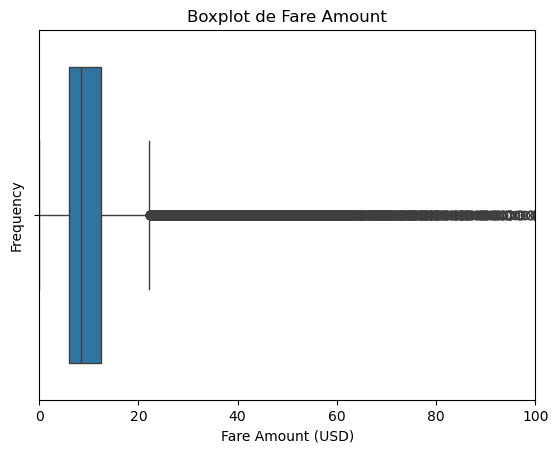

In [681]:
# Hacemos un boxplot para ver de mejor manera la distribución de fare amount
sns.boxplot(x=datos['fare_amount'])

# Personalizar el gráfico
plt.xlim(0,100)
plt.title("Boxplot de Fare Amount")
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Frequency")
plt.show()

- Nuevamente vemos que la mayor proporción de viajes tiene tarifas bajas, con una gran presencia de valores atípicos que pueden corresponder a errores en la construcción de los datos brutos.

- Podemos analizar la variable pickup time, y tomar la cantidad de viajes por hora. De esta manera ver que horas son las de mayor demanda del servicio de Uber.

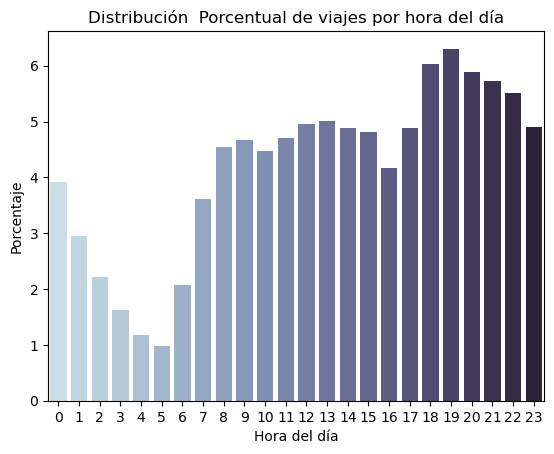

In [682]:
# Convertir a datetime
datos['pickup_datetime'] = pd.to_datetime(datos['pickup_datetime'])

# Extraer características
datos['hour'] = datos['pickup_datetime'].dt.hour
datos['day_of_week'] = datos['pickup_datetime'].dt.dayofweek
datos['month'] = datos['pickup_datetime'].dt.month
datos['year'] = datos['pickup_datetime'].dt.year

# Visualizar la cantidad de viajes por hora
sns.countplot(x='hour', data=datos, palette=sns.color_palette('ch:s=.25,rot=-.25', as_cmap=True), hue='hour', stat='percent', legend=False)
plt.title("Distribución  Porcentual de viajes por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Porcentaje")
plt.show()

- En la **Distribución porcentual de viajes por hora** podemos observar que las horas de 7 a 9 am y de 6 a 10 pm son las horas con la mayor cantidad de demanda del servicio de renta de uber, principalmente las horas de entrada y salida de las oficinas. Por otra parte esa tendencia decrece hasta las 11 pm quiza añadiendo también el efecto de las salidas nocturnas con el objetivo de consumo de bienes y servicios, es decir la vida nocturna comercial en general.

In [683]:
# Ver tipos de datos 
datos.dtypes

ID                                 int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int32
day_of_week                        int32
month                              int32
year                               int32
dtype: object

- Analizar la cantidad de pasajeros

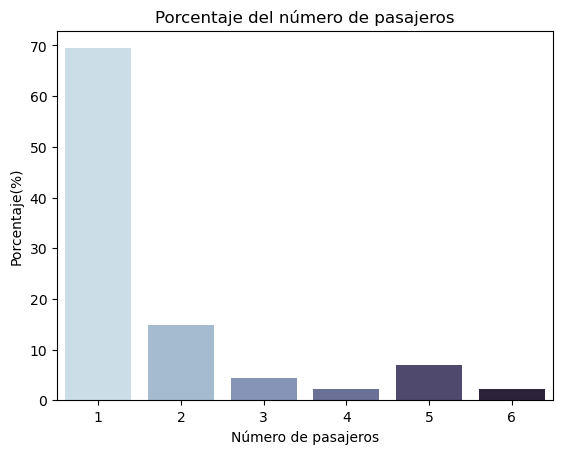

count    199273.00
mean          1.69
std           1.31
min           1.00
25%           1.00
50%           1.00
75%           2.00
max           6.00
Name: passenger_count, dtype: float64


In [684]:
# Distribución de pasajeros
sns.countplot(x='passenger_count', data=datos, hue='passenger_count', stat='percent', legend=False, 
              palette= sns.color_palette('ch:s=.25,rot=-.25', as_cmap=False))
plt.title("Porcentaje del número de pasajeros")
plt.xlabel("Número de pasajeros")
plt.ylabel("Porcentaje(%)")
plt.show()

# Resumen estadístico
print(np.round(datos['passenger_count'].describe(),2))

- En la **Distribución del número de pasajeros** podemos observar que casi el 70% de los viajes en Uber para Nueva York son de un solo pasajero, por otra parte aproximadamente el 15% de los viajes son de dos pasajeros. Esto implica que el 85% de los viajes en uber son de dos pasajeros o menos.

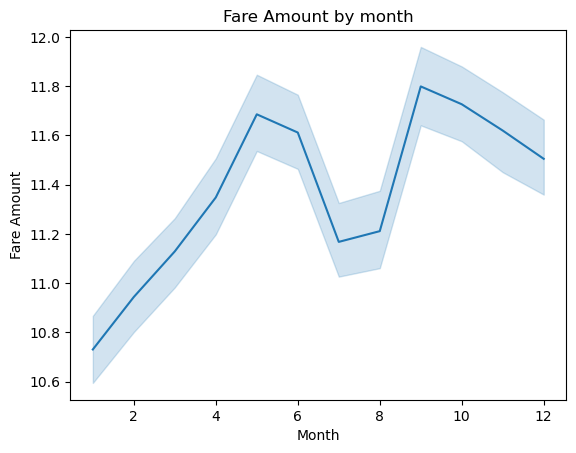

In [685]:
# Precio por mes
sns.lineplot(x='month', y='fare_amount', data=datos)
plt.xlabel('Month')
plt.ylabel('Fare Amount')
plt.title('Fare Amount by month')
plt.show()

- Respecto a la **Tarifa de viaje por mes** podemos ver una tendencia general creciente a lo largo de los meses, con un componente estacional de alrededor de 5 meses. En general los picos de más alta demanda se dan en los meses 5 y 9 del año, asociado a meses cercanos o en etapa de vacaciones y festividades.

. Calculamos la distancia de viaje en Km a través del método Harversine, que nos permite encontrar la distancia entre dos puntos en una esfera y vemos algunas medidas de resumen.

In [686]:
# Filtramos latitudes y longitudes válidas
datos = datos[
    (datos['pickup_latitude'].between(-90, 90)) & 
    (datos['dropoff_latitude'].between(-90, 90)) & 
    (datos['pickup_longitude'].between(-180, 180)) & 
    (datos['dropoff_longitude'].between(-180, 180))
]

# Verificar el tamaño del dataset después del filtrado

print(f"Registros después del filtrado: {len(datos)}")


Registros después del filtrado: 199261


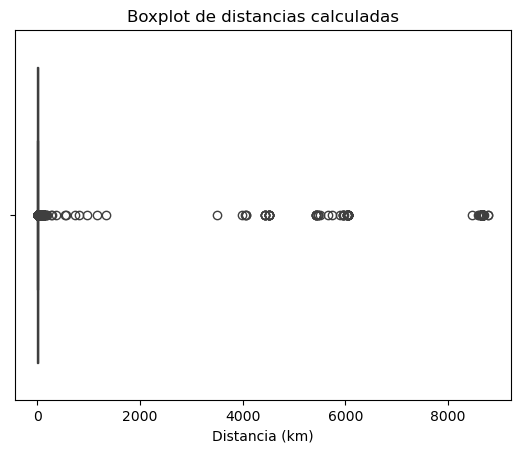

In [687]:
from geopy.distance import geodesic

def haversine_distance(row):
    """
    Calculamos la distancia geodesica a partir de las coordendas
    donde recoge al pasajero 'pickup' y las coordendas de llegada
    al destino 'dropoff'
    """
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

datos['distance_km'] = datos.apply(haversine_distance, axis=1)

# Distribución de distancias
sns.boxplot(x=datos['distance_km'])

# Personalización del gráfico
plt.title("Boxplot de distancias calculadas")
plt.xlabel("Distancia (km)")
plt.show()

- En el **Boxplot de Distancias Calculadas** tenemos que casi todas las distancias estan centradas en valores pequeños menores a 10 kilómetros, exactamente el 75%. Existe una alta presencia de valores atípicos con distancias de 100 km llegando hasta más de 8000 km lo que nos sugeriría que pueden existir errores en la construcción de los datos asociado a la longitud y latitud de recogida y llegada del servicio. Estos datos atípicos pueden causarnos ruido, por lo que es adecuado identificarlos y ver que tantos hay.

In [688]:
np.round(datos['distance_km'].describe(),2)

count    199261.00
mean         20.37
std         377.38
min           0.00
25%           1.22
50%           2.12
75%           3.88
max        8783.59
Name: distance_km, dtype: float64

In [689]:
# Convertir variables cualitativas en Dummies
columnas = ['hour','day_of_week','month','year']
datos[columnas] = datos[columnas].astype(int)
datos_dummies = pd.get_dummies(datos, columns=['hour','day_of_week','month','year'], drop_first=False, dtype= int)
datos_dummies.columns

Index(['ID', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015'],
      dtype='object')

In [690]:
# Detectar valores atípicos de la distancia usando Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
puntuaciones_lof = clf.fit_predict(datos_dummies['distance_km'].to_numpy().reshape(-1, 1))
scores_lof = clf.negative_outlier_factor_
datos['score_lof'] = scores_lof
print(scores_lof)

[-0.98333119 -0.9839119  -1.0687695  ... -1.00094756 -1.01839945
 -0.99608783]


- Para el tratamiento de los valores atípicos en la distancia de los viajes, usamos un algoritmo usado en la detección de anomalias llamado Local Outlier Factor, fundamentalmente está basado en el concepto de densidad local, donde la localidad es dada por los $k$ vecinos más cercanos, cuya distancia es usada para estimar la densidad, en ese orden de ideas comparamos la densidad local de un objeto respecto a las densidades de sus vecinos, así identificando regiones de densidad similar y a su vez puntos con una densidad sustancialmente menor a la de sus vecinos (outliers).

- Si $LOF(k) = 1 \; \text{existe una densidad similar a la de los vecinos}$

- Sí $LOF(k) > 1 \; \text{existe una densidad más baja que la de los vecinos (outlier)}$

- Sí $LOF(k) < 1 \;  \text{existe una densidad más alta que la de los vecinos (inlier)}$

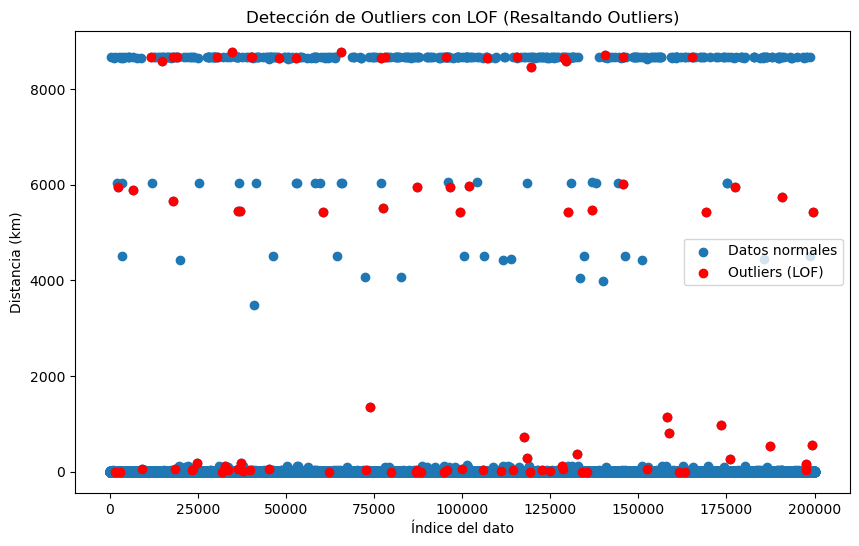

In [691]:
# Identificar outliers (-1 indica outlier)
outliers = datos_dummies[puntuaciones_lof == -1]

# 4. Scatter plot resaltando outliers
plt.figure(figsize=(10, 6))
plt.scatter(datos.index, datos['distance_km'], label='Datos normales')
plt.scatter(outliers.index, outliers['distance_km'], c='red', label='Outliers (LOF)')  # Resaltar outliers en rojo
plt.title('Detección de Outliers con LOF (Resaltando Outliers)')
plt.xlabel('Índice del dato')
plt.ylabel('Distancia (km)')
plt.legend()
plt.show()


In [692]:
import geopandas as gpd
import os

# Quitamos outliers 
datos_sin_outliers = datos_dummies[puntuaciones_lof == 1]
print(f"Datos originales: {len(datos)}")
print(f"Datos sin outliers (método LOF): {len(datos_sin_outliers)}")

Datos originales: 199261
Datos sin outliers (método LOF): 199172


- Miramos el comportamiento de correlación entre la distancia de viaje y la tarifa:

In [693]:
import inspect

def obtener_directorio_notebook():
    """
    Obtiene el directorio del notebook actual o el directorio de trabajo.
    """
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':  # Jupyter Notebook or IPython
            import __main__
            if hasattr(__main__, '__file__'): #Comprobar si existe el atributo __file__
                file_path = __main__.__file__
                return os.path.dirname(os.path.abspath(file_path))
            else:
                print("Ejecutando en un entorno interactivo sin __file__. Usando el directorio de trabajo actual.")
                return os.getcwd() # Usar el directorio de trabajo actual si __main__.__file__ es None
        else:  # Script normal de Python
            return os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) #Usar inspect para obtener la ruta del script
    except NameError:  # No se detecta get_ipython (no es un entorno interactivo)
        return os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))

#

def obtener_limites_nyc(nombre_archivo="new_york_map.shp", carpeta_datos="data"):
    '''
    Esta función se encarga de obtener y unir todos los bordes para el mapa de nueva York,
    asi como obtener su coordenadas máximas y minimas en terminos de latitud y longitud.
    '''
    script_dir = obtener_directorio_notebook()
    data_dir = os.path.join(script_dir, carpeta_datos)
    shapefile_path = os.path.join(data_dir, nombre_archivo)

    try:
        gdf = gpd.read_file(shapefile_path)
        if gdf.empty:
            print("Error: El GeoDataFrame está vacío.")
            return None

        if not gdf.is_valid.all():
            print("Geometrías inválidas encontradas. Intentando corregir...")
            gdf['geometry'] = gdf.geometry.buffer(0)
            if not gdf.is_valid.all():
                print("Error: No se pudieron corregir las geometrías inválidas.")
                return None

        nyc_boundary = gdf.geometry.union_all()
        return nyc_boundary.bounds

    except FileNotFoundError:
        print(f"Error: No se encontró el archivo en la ruta: {shapefile_path}")
        return None
    except Exception as e:
        print(f"Ocurrió un error al leer el shapefile: {e}")
        return None

    

Ejecutando en un entorno interactivo sin __file__. Usando el directorio de trabajo actual.
Longitud mínima: -74.25559136315213
Latitud mínima: 40.496133987611834
Longitud máxima: -73.7000090638712
Latitud máxima: 40.91553277650267


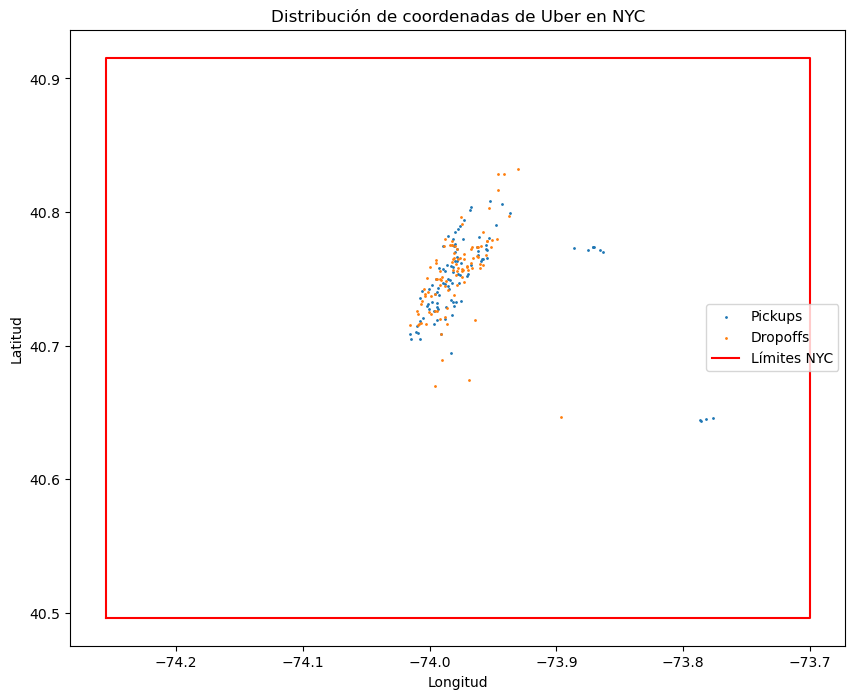

Datos filtrados por coordenadas: 102
              ID                            key  fare_amount  \
2497     6452891  2013-05-22 10:54:00.000000168         6.00   
4376    44648183   2013-05-24 00:43:00.00000010        12.50   
4424     3826665   2013-05-25 01:16:00.00000017         9.50   
4747    52635142   2013-05-22 12:38:00.00000094         6.50   
7367    45851743  2013-05-23 00:29:00.000000104        10.50   
...          ...                            ...          ...   
184570  22770548  2013-05-25 14:57:00.000000140         9.00   
185317  10051528  2013-05-22 14:43:00.000000226        10.50   
189045   6364125   2013-05-24 00:35:00.00000013        42.33   
190154  36869885   2013-05-23 15:55:00.00000084        57.33   
193339  37780326  2013-05-24 22:11:00.000000219        57.33   

                 pickup_datetime  pickup_longitude  pickup_latitude  \
2497   2013-05-22 10:54:00+00:00        -73.982127        40.746760   
4376   2013-05-24 00:43:00+00:00        -73.970777  

In [694]:
# Ejecutar función
limites_nyc = obtener_limites_nyc()

if limites_nyc:
    minx, miny, maxx, maxy = limites_nyc
    print(f"Longitud mínima: {minx}")
    print(f"Latitud mínima: {miny}")
    print(f"Longitud máxima: {maxx}")
    print(f"Latitud máxima: {maxy}")

    # Intercambio de columnas 
    datos_sin_outliers[['pickup_longitude', 'pickup_latitude']] = datos_sin_outliers[['pickup_latitude', 'pickup_longitude']].values
    datos_sin_outliers[['dropoff_longitude', 'dropoff_latitude']] = datos_sin_outliers[['dropoff_latitude', 'dropoff_longitude']].values

    # Convertir a numérico y manejar errores
    for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
        try:
            datos_sin_outliers[col] = pd.to_numeric(datos_sin_outliers[col], errors='raise') # Intenta convertir y si falla lanza la excepcion
        except ValueError as e:
            print(f"Error al convertir la columna {col}: {e}")
            print(f"Valores únicos en la columna {col}: {datos_sin_outliers[col].unique()}") # Imprime los valores unicos para ver que tipo de datos hay
            datos_sin_outliers[col] = pd.to_numeric(datos_sin_outliers[col], errors='coerce') # Si falla la conversion, se coerce a fuerza
            
    # Manejo de valores nulos (DESPUÉS de la conversión)
    datos_sin_outliers = datos_sin_outliers.dropna(subset=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

    # Filtrado (con manejo de posibles errores de tipo en los límites)
    try:
        df_filtrado_coordenadas = datos_sin_outliers[
            (datos_sin_outliers['pickup_latitude'] >= miny) &
            (datos_sin_outliers['pickup_latitude'] <= maxy) &
            (datos_sin_outliers['pickup_longitude'] >= minx) &
            (datos_sin_outliers['pickup_longitude'] <= maxx) &
            (datos_sin_outliers['dropoff_latitude'] >= miny) &
            (datos_sin_outliers['dropoff_latitude'] <= maxy) &
            (datos_sin_outliers['dropoff_longitude'] >= minx) &
            (datos_sin_outliers['dropoff_longitude'] <= maxx)
        ].copy()
    except TypeError as e:
        print(f"Error durante el filtrado: {e}")
        print(f"Tipo de miny: {type(miny)}, valor: {miny}")
        print(f"Tipo de pickup_latitude: {datos_sin_outliers['pickup_latitude'].dtype}")

    # Visualización
    plt.figure(figsize=(10, 8))
    if not df_filtrado_coordenadas.empty:
        plt.scatter(df_filtrado_coordenadas['pickup_longitude'], df_filtrado_coordenadas['pickup_latitude'], s=1, label='Pickups')
        plt.scatter(df_filtrado_coordenadas['dropoff_longitude'], df_filtrado_coordenadas['dropoff_latitude'], s=1, label='Dropoffs')
        plt.plot([minx, maxx, maxx, minx, minx], [miny, miny, maxy, maxy, miny], 'r-', label='Límites NYC')
        plt.title("Distribución de coordenadas de Uber en NYC")
        plt.xlabel("Longitud")
        plt.ylabel("Latitud")
        plt.legend()
        plt.show()
    else:
        print("El dataframe filtrado esta vacio, no se puede graficar")

    print(f"Datos filtrados por coordenadas: {len(df_filtrado_coordenadas)}")
    print(df_filtrado_coordenadas)
else:
    print("No se pudieron obtener los límites de NYC. Verifica la ruta al shapefile y que el archivo exista.")

- Ajustando las latidudes y longitudes dentro del rango interior a los bordes de la ciudad de Nueva York tenemos viajes válidos y consistentes con el objeto de estudio que es la relación y predicción de los precios de tarifa de viaje en esta misma ciudad. Así notamos que las grandes distancias atípicas existentes en el análisis exploratorio anterior podían estar asociadas a erorres de registro en las latitudes y longitudes ya fuesen de recogida o llegada.

In [695]:
df_filtrado_coordenadas.shape

(102, 60)

In [696]:
df_filtrado_coordenadas.columns

Index(['ID', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance_km', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015'],
      dtype='object')

In [697]:
# Calcular la correlación entre la tarifa y la distancia de viaje (km)
correlacion = df_filtrado_coordenadas['fare_amount'].corr(df_filtrado_coordenadas['distance_km'])
np.round(correlacion,4) #No muestra una correlación muy fuerte entre la distancia de viaje y la tarifa del servicio

0.9134

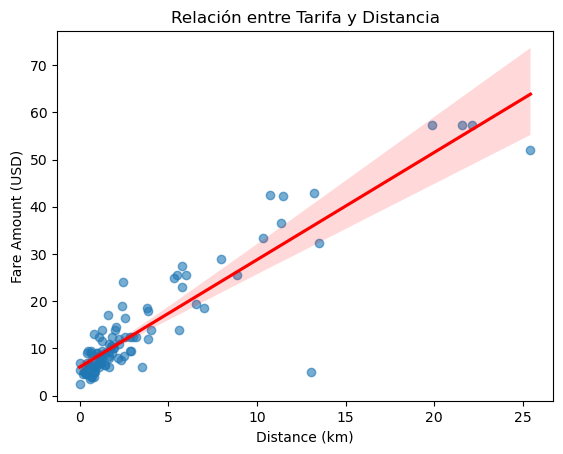

In [698]:
# Crear un gráfico de dispersión y añadimos linea de regresión
sns.regplot(x='distance_km', y='fare_amount', data = df_filtrado_coordenadas, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})

#
plt.title("Relación entre Tarifa y Distancia")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount (USD)")
plt.show()

- Podemos ver en el gráfico de **Tarifa vs Distancia de Viaje** que existe una relación lineal entre estas dos variables, en ese orden de ideas a meida que aumenta la distancia en kilómetros del recorrido mayor será la tarifa de viaje.

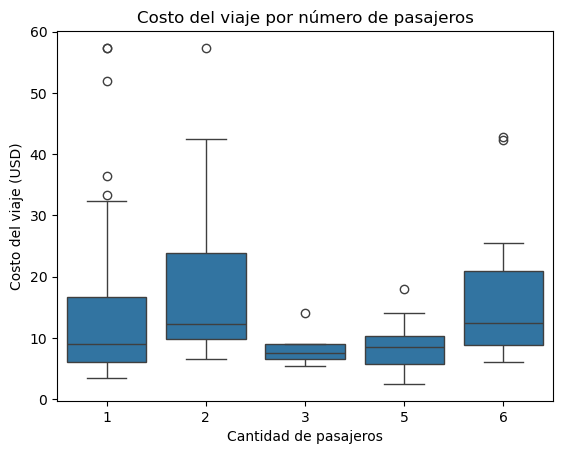

In [699]:
# Relación de la tarifa con la cantidad de pasajeros
sns.boxplot(x='passenger_count', y='fare_amount', data=df_filtrado_coordenadas)
plt.title("Costo del viaje por número de pasajeros")
plt.xlabel("Cantidad de pasajeros")
plt.ylabel("Costo del viaje (USD)")
plt.show()

- El gráfico del **Costo de viaje por número de pasajeros** podemos ver como varía el costo de los viajes en función del número de pasajeros, destacando la dispersión de los precios y la presencia de valores atípicos. Se observa que el número de pasajeros no es el único factor determinante del precio, y que existen otros factores que influyen, especialmente para los viajes con 1 y 2 pasajeros. El grupo de 3 pasajeros parece tener precios más consistentes. 

In [700]:
df_filtrado_coordenadas.describe()

,ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour_0,hour_1,...,month_10,month_11,month_12,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
count,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0
mean,2.761179e+07,13.973627,-73.966868,40.748866,-73.978994,40.753773,2.215686,3.487924,0.058824,0.019608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,1.704106e+07,12.244434,0.049380,0.032982,0.020037,0.030267,1.875467,4.922291,0.236456,0.139333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,5.827370e+05,2.500000,-74.015515,40.643332,-74.015750,40.646770,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,1.345823e+07,6.500000,-73.993150,40.731266,-73.993693,40.738116,1.000000,0.860286,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,2.556742e+07,9.500000,-73.981239,40.753122,-73.980613,40.757545,1.000000,1.652380,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,4.460037e+07,14.375000,-73.962075,40.771924,-73.966523,40.772414,3.000000,3.458478,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,5.531227e+07,57.330000,-73.776860,40.808425,-73.896347,40.831932,6.000000,25.430873,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [701]:
#  
correlation_matrix = df_filtrado_coordenadas[['fare_amount',
       'passenger_count', 'distance_km', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015']].corr()
correlation_matrix.loc[:,['fare_amount']]

,fare_amount
fare_amount,1.000000
passenger_count,-0.005864
distance_km,0.913448
hour_0,0.075193
hour_1,0.139589
hour_2,0.064144
hour_3,NaN
hour_4,0.058341
hour_5,NaN
hour_6,-0.069201


- La presencia NaN en las variables de mes y año son normales al tratarse de variables dummy. En este caso la correlación es una primera forma de abordar el posible efecto o relación de las covariables con la tarifa del viaje en Uber.

### Construcción de Modelos

In [702]:
# Construimos los datos de entrenamiento y testeo
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = datos_sin_outliers.loc[:,['passenger_count', 'distance_km', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015']]
Y = datos_sin_outliers.loc[:,['fare_amount']]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

# Escalamos los datos para que tomen valores de 0 y 1
scaler = MinMaxScaler()

# Ajustar los datos de entrenamiento y testeo
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [703]:
# Modelo Lineal
from sklearn.metrics import *

modelo_lineal = LinearRegression(fit_intercept=True)
modelo_lineal.fit(X_train,y_train)

# Predicciones y calculo de error
y_train_pred = modelo_lineal.predict(X_train)
y_test_pred = modelo_lineal.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)


print(f'RMSE en entrenamiento: {rmse_train}')
print(f'RMSE en testeo: {rmse_test}')
print(f'MAE en testeo: {MAE_test}')
print(f'MSE en testeo es {rmse_test**2}')

RMSE en entrenamiento: 9.711333759045933
RMSE en testeo: 9.682018397609054
MAE en testeo: 5.987687187456069
MSE en testeo es 93.7414802516402


- El modelo muestra un rendimiento razonable, con un RMSE de testeo de alrededor de 10. Esto significa que, en promedio, las predicciones del modelo se desvían en aproximadamente 10 unidades de los valores reales en el conjunto de testeo.

- La diferencia relativamente pequeña entre el RMSE de entrenamiento y el de testeo sugiere que el modelo no está sobreajustando los datos de entrenamiento.

- La diferencia entre el RMSE y el MAE indica la presencia de algunos errores grandes. Si bien la mayoría de las predicciones están relativamente cerca del valor real (como indica el MAE de alrededor de 6), hay algunos valores atípicos que influyen en el RMSE.

In [704]:
# Modelo Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#
ridge = Ridge(random_state=44)

# Definir el rango de valores para alpha
param_grid = {'alpha': np.logspace(-3, 3, 100)}

# Configurar y ajustar GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y alpha
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_
print(f'Mejor valor del alpha: {best_alpha}')

# Predicciones y cálculo de errores
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
#
print(f'RMSE en entrenamiento: {rmse_train}')
print(f'RMSE en testeo: {rmse_test}')
print(f'MAE en testeo: {MAE_test}')
print(f'MSE en testeo es {rmse_test**2}')

Mejor valor del alpha: 13.219411484660288
RMSE en entrenamiento: 9.709981168967909
RMSE en testeo: 9.682252412674588
MAE en testeo: 5.983475296026639
MSE en testeo es 93.74601178274288


- En terminos de minimizar el menor error cuadrático medio (MSE) el valor del hiperparámetro de regularización alpha 13.21 proporciona el mejor rendimiento. Esto implica que cierto grado de regularización es beneficioso para el modelo, sugiriendo la posible presencia de multicolinealidad o sobreajuste en el modelo MCO sin embargo al comparar el RMSE de Ridge y el modelo lineal normal no hay una mejora significativa de las métricas de error.

In [705]:
# Modelo Lasso
from sklearn.linear_model import Lasso

# Rango de valores para alpha
alphas = np.logspace(-3, 3, 100)

# Configurar modelo Lasso
lasso = Lasso(max_iter=10000, random_state=44) # Asegurar convergencia

# Configurar GridSearchCV 
param_grid = {'alpha':alphas}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mejor modelo y valor alpha
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_
print(f'El mejor valor de alpha es: {best_alpha}')

# Predicciones y cálculo de error
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)

print(f'RMSE en entrenamiento: {rmse_train}')
print(f'RMSE en testeo: {rmse_test}')
print(f'MAE en testeo: {MAE_test}')
print(f'MSE en testeo es {rmse_test**2}')


El mejor valor de alpha es: 0.001
RMSE en entrenamiento: 9.710045603236619
RMSE en testeo: 9.68220681094501
MAE en testeo: 5.983470616284495
MSE en testeo es 93.74512872990994


- Con un valor de alpha de 0.001 prácticamente no hay regularización por lo que el modelo se comportara como el modelo MCO.

- No hay una diferencia significativa entre el la raíz del error cuadrático medio(RMSE) en entrenamiento y testeo sugiriendo una buena generalización en las predicciones.

- A nivel general la regularización para este conjunto de datos no muestra una ganancia en la potencia de predicción en comparación a un modelo lineal normal. 

In [706]:
# Arboles de Regresión
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Modelo de árbol
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
param_grid = {'max_depth': np.arange(2,11)} # 2 a 10 niveles de profundidad

#Búsqueda de la mejor profundidad
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener resultados
best_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_
print(f'Mejor profundidad del árbol es: {best_depth}')

# Predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calcular el MSE
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)

print(f'RMSE en entrenamiento: {rmse_train}')
print(f'RMSE en testeo: {rmse_test}')
print(f'MAE en testeo: {MAE_test}')
print(f'MSE en testeo es {rmse_test**2}')

Mejor profundidad del árbol es: 7
RMSE en entrenamiento: 5.1590657705420995
RMSE en testeo: 4.981977196052606
MAE en testeo: 2.671089119627262
MSE en testeo es 24.820096781988184


- La diferencia entre el RMSE de entrenamiento y el de testeo no es excesivamente grande, lo que sugiere que el modelo no está sobreajustando severamente los datos de entrenamiento, aunque existe cierta diferencia.

- El MAE en testeo es considerablemente menor que el RMSE en testeo. Esto indica la presencia de algunos errores grandes (valores atípicos) que influyen más en el RMSE que en el MAE.

- El Árbol de Regresión muestra una mejora significativa en el rendimiento en comparación con los modelos lineales (Normal, Ridge y Lasso), ya que su RMSE en testeo es mucho menor. Esto indica que el árbol de regresión se ajusta mejor a los datos y generaliza mejor a observaciones nuevas.

In [707]:
# Bosque Aleatorio
import warnings
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

# Crear modelo
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_distributions = {
    'n_estimators': randint(80, 130),
    'max_depth': randint(5,12),
    'min_samples_split': randint(5, 10),
    'min_samples_leaf': randint(4, 10),
    'max_features': uniform(0, 1.0)  # 
}

n_iter = 15  
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=n_iter, cv=5, scoring='neg_mean_squared_error',
                                   verbose=0, random_state=42)

random_search.fit(X_train, y_train.values.ravel())


# Obtener los mejores parámetros y el mejor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Mejores parámetros: {best_params}")

# Predicciones y evaluación
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)) 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'RMSE en entrenamiento: {rmse_train:.2f}')
print(f'RMSE en testeo: {rmse_test:.2f}')
print(f'MAE en testeo: {mae_test}')
print(f'MSE en testeo es {mse_test}')

Mejores parámetros: {'max_depth': 11, 'max_features': 0.7965429868602328, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 100}
RMSE en entrenamiento: 4.86
RMSE en testeo: 4.71
MAE en testeo: 2.316494626138648
MSE en testeo es 22.220919130248433


- En general respecto a todos los modelos de predicción hechos, el modelo normal, el modelo con regularización Lasso y Ridge el bosque aleatorio permite encontrar el modelo predictivo de la tarifa de viaje con el menos error, por otra parte su RMSE en entrenamiento y testeo es cercano lo que implica que no hay sobreajuste en el entrenamiento y sus resultados se pueden generalizar para nuevas observaciones.

- Respecto a los hiperparámetros del modelo, árboles con 11 capas de profundidad, muestras mínimas de partición de 9 y 100 árboles recolectan mayor variedad de características que alimentan la predicción del modelo.